# Lineare Regression
In this notebook, linear regression is used to make predictions on the advertising dataset. The aim is to make predictions about sales revenues on the basis of advertising spending (in the "TV", "Radio" and "Newspaper" sectors). 
*Note:* The dataset is available in the `data` folder.

## Initialisation
First we load the data from the csv file `advertising.csv` into a Pandas DataFrame and have a quick look at the data.

In [3]:
import pandas as pd

In [4]:
# Load data
data_raw = pd.read_csv("data/advertising.csv")
data_raw.head()

,index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Another useful method to get a quick overview of the dimensions of the data is the `.shape` attribute. This returns a tuple with the number of rows and columns in the DataFrame.

In [5]:
rows, cols = data_raw.shape
print(f"Number of rows: {rows} \nNumber of columns: {cols}")

Number of rows: 200 
Number of columns: 5


## IPython insertion 

The IPython shell is a powerful interactive Python shell that has lots of interesting features including named inputs and outputs, access to shell commands, improved debugging and much more. In addition, the `display` module provides a number of functions for displaying data. For more information, see the [IPython documentation](https://ipython.readthedocs.io/en/stable/)

In [6]:
# Supplement 1 to last lecture
from IPython.display import display
display(data_raw.head())

,index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Back to linear regression: As can be seen in the data, there are two index columns. To remove this redundancy, we will use the `drop` method.

In [7]:
# Use columns attribute to get column names of a DataFrame
print(data_raw.columns)
# data = data_raw.drop(columns=data_raw.columns[0])
# data = data_raw.drop(columns="index")
data = data_raw.drop(columns=["index"])
data.head()

Index(['index', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Next, we visualize the data points using the `matplotlib` library. \
For this we create a plot, which shows the `TV` data on the x-axis and the `sales` data on the y-axis.

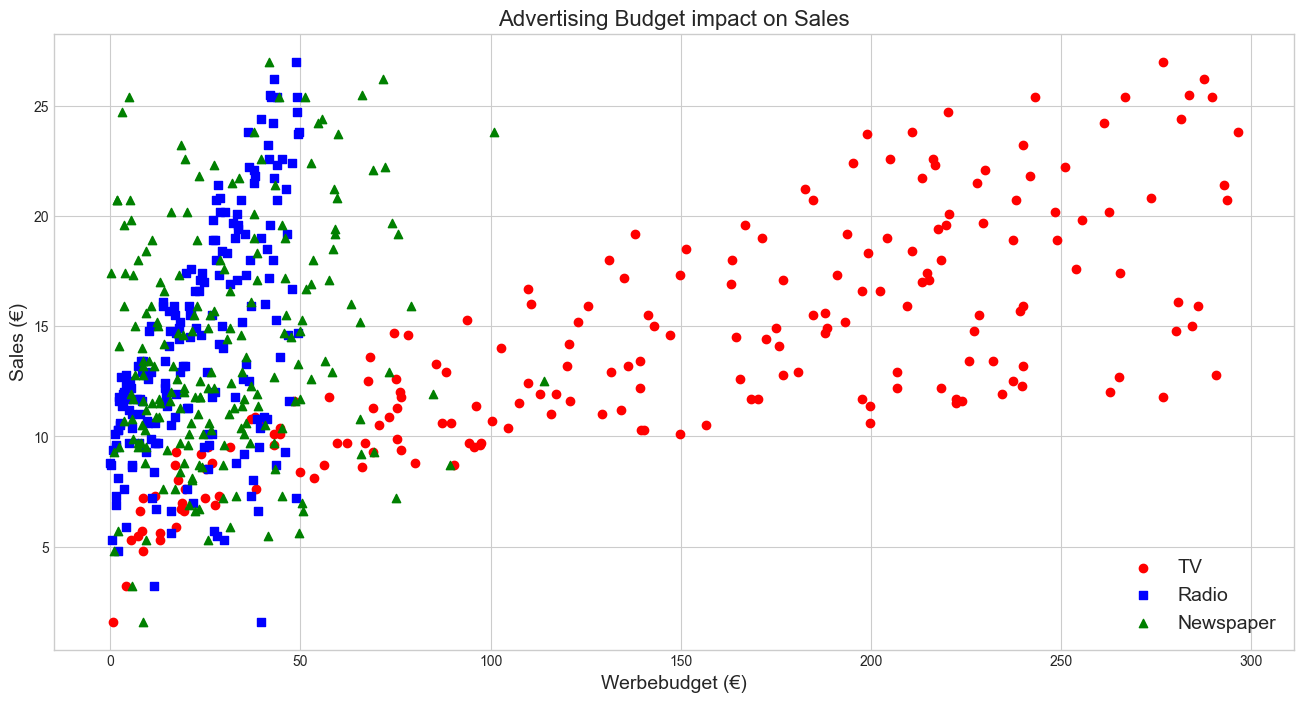

In [8]:
# Import
import matplotlib.pyplot as plt

# Plot
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(16, 8))
plt.scatter(x=data['TV'], y=data['sales'], c='red', marker='o', label='TV')
plt.scatter(x=data['radio'], y=data['sales'], c='blue', marker='s', label='Radio')
plt.scatter(x=data['newspaper'], y=data['sales'], c='green', marker='^', label='Newspaper')
plt.xlabel("Werbebudget (€)", fontsize=14)
plt.ylabel("Sales (€)", fontsize=14)
plt.title("Advertising Budget impact on Sales", fontsize=16)
plt.legend(fontsize=14)
plt.show()

## Training a linear regression model
As a first model we train a linear regression with only one feature, which in this case is the column `TV`.

### Preprocessing
Before we start training, we split the available data into *training* and *test* data, where the training data should contain 80% of the original data and the test data 20%.

In [9]:
# Sample training data from original data
train_data = data.sample(frac=0.8, random_state=0)

# Get test data by dropping training data from original data
test_data = data.drop(train_data.index) 

print(f"Training data: {train_data.shape} \nTest data: {test_data.shape}")

Training data: (160, 4) 
Test data: (40, 4)


We then train a linear regression on the training data with the feature `TV` and the label `sales`. 

For this we create...
1. a DataFrame with the feature `TV` (`X_train`) and 
2. a Series with the label (`y_train`).

To get `X_train` as a DataFrame and not as a Series, we have to pass `TV` as part of a list (double brackets `[[]]`). The following code shows the difference:

In [10]:
# Features
X_series = train_data['TV'] 
X_df = train_data[['TV']] 
y_series = train_data['sales']

# Print data types
print(f"Datentyp von X_series: {type(X_series)}")
print(f"Datentyp von X_df: {type(X_df)}")
print("Datentyp von y_train:", type(y_series))

# Assign train data
X_train = X_df 
y_train = y_series

Datentyp von X_series: <class 'pandas.core.series.Series'>
Datentyp von X_df: <class 'pandas.core.frame.DataFrame'>
Datentyp von y_train: <class 'pandas.core.series.Series'>


Now we're ready to train the model. We use the `LinearRegression` class from the `sklearn.linear_model` module. The `fit` method takes the training data as input and trains the model.
Detailled information about the `LinearRegression` class can be found in the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [11]:
# Import
from sklearn.linear_model import LinearRegression

# Training
reg = LinearRegression()
# reg = LinearRegression(positive=True)
reg.fit(X_train, y_train)

LinearRegression()

The linear regression is now trained and the model weights are available in the `reg` variable. We can now output the regression line.

In [12]:
print(f"regression line: y = {reg.intercept_} + {reg.coef_[0]} * TV")

regression line: y = 6.74579267454039 + 0.04950397743349265 * TV


With the trained model, we can now make predictions on individual data points. We use the `predict` method for this, which uses the trained model to predict the label for the given data point.

In [13]:
data_point = X_train.iloc[[0]] # Index first row and convert it to DataFrame to avoid UserWarnings
prediction = reg.predict(data_point) # predict-Methode erwartet Liste von Datenpunkten 
print(f"With a TV advertising budget of {data_point['TV'].iloc[0]:.2f}€, {prediction[0]:.2f}€ revenue is generated.")

With a TV advertising budget of 69.20€, 10.17€ revenue is generated.


To visualize what the trained regression line looks like, we make predictions with the model on the training data points.

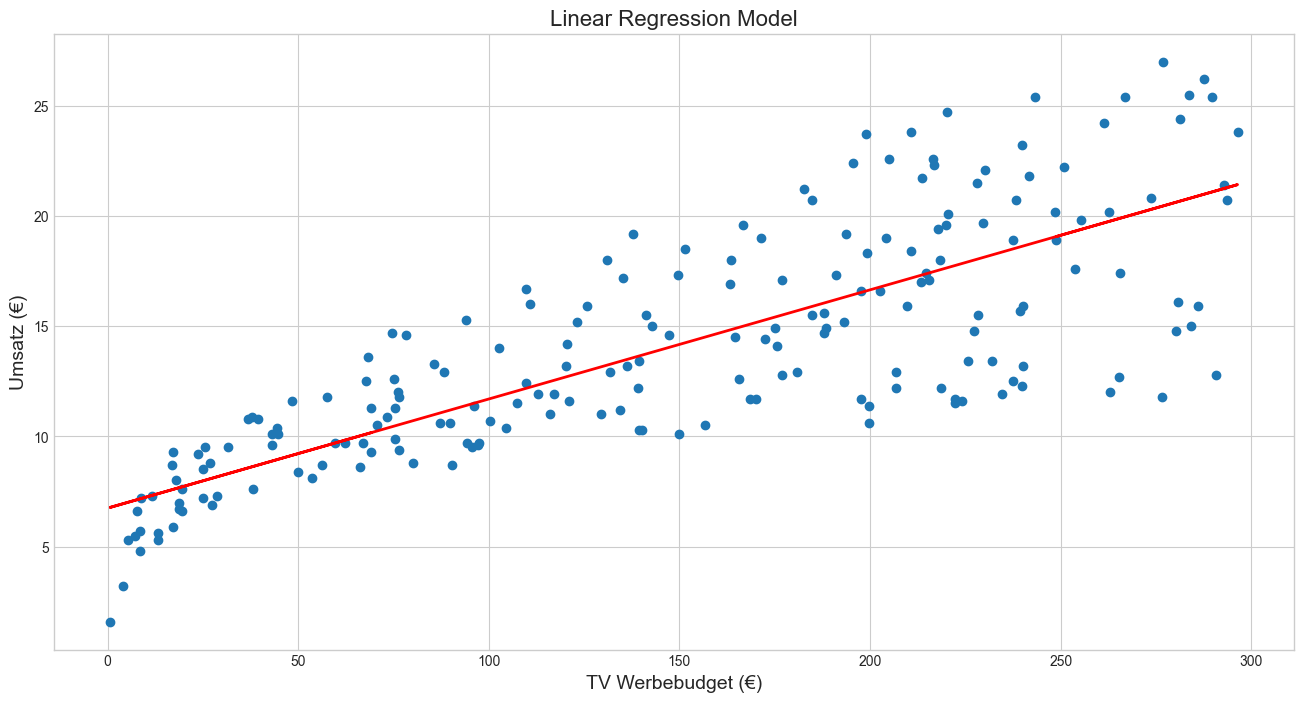

In [14]:
prediction_train = reg.predict(X_train) # prediction on training data
plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['sales']) # training data
plt.plot(X_train['TV'], prediction_train, c='r', linewidth=2) # regression line
plt.xlabel("TV Werbebudget (€)", fontsize=14)
plt.ylabel("Umsatz (€)", fontsize=14)
plt.title('Linear Regression Model', fontsize=16)
plt.show()

## Testen des Regressionsmodells
To check the performance and quality of the trained regression model, we will predict on our test data and determine the mean squared error (MSE). 

In [15]:
# Import
from sklearn.metrics import mean_squared_error

# Split test data
X_test = test_data[['TV']] 
y_test = test_data[['sales']]   

# Prediction and MSE calculation
prediction_test = reg.predict(X_test)
test_error =  mean_squared_error(y_test, prediction_test)
print("Mean squared error (MSE) on test data:", round(test_error,2))

Mean squared error (MSE) on test data: 14.41


## Multidimensional linear regression
We now extend linear regression by using all available features. 

In [16]:
# Define training data
X_train = train_data[["TV", "radio", "newspaper"]]
y_train = train_data['sales']

# Training
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
print(f"Regression line: Y = {reg_all.intercept_:.4f} + {reg_all.coef_[0]:.4f} * TV + {reg_all.coef_[1]:.4f} * radio + {reg_all.coef_[2]:.4f} * newspaper")

Regression line: Y = 2.9008 + 0.0470 * TV + 0.1823 * radio + -0.0013 * newspaper


Finally, we use the new model to again make predictions on the test data.

In [17]:
X_test = test_data[["TV", "radio", "newspaper"]]
y_test = test_data['sales']
predictions = reg_all.predict(X_test)
mse =  mean_squared_error(y_test, predictions)
print(f"Mean squared error (MSE) on test data: {mse:.2f}")

Mean squared error (MSE) on test data: 3.16


As we can see, the prediction for the multidimensional model is better than the normal linear regression (the MSE is much smaller). So adding the new features improves the predictive power of the model.